# Step 1.0: Preprocessing

In [75]:
# imports here
import pandas as pd
import numpy as np
import pyodbc
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [76]:
# Load data in
df = pd.read_csv("covid.csv")

# Step 1.1: Get feel for the data

In [77]:
df.dtypes

Unnamed: 0                  int64
Unnamed: 0.1                int64
date                       object
county                     object
state                      object
fips                        int64
cases                       int64
deaths                      int64
CENSUS2010POP               int64
ESTIMATESBASE2010           int64
POPESTIMATE2019             int64
NPOPCHG_2019                int64
BIRTHS2019                  int64
DEATHS2019                  int64
NATURALINC2019              int64
RESIDUAL2019                int64
GQESTIMATES2019             int64
RBIRTH2019                float64
RDEATH2019                float64
RNATURALINC2019           float64
AREA_SQMI                 float64
E_HU                        int64
E_HH                        int64
E_POV                       int64
E_UNEMP                     int64
E_PCI                       int64
E_NOHSDP                    int64
E_AGE65                     int64
E_AGE17                     int64
E_DISABL      

In [78]:
df.head()

,Unnamed: 0,Unnamed: 0.1,date,county,state,fips,cases,deaths,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2019,NPOPCHG_2019,BIRTHS2019,DEATHS2019,NATURALINC2019,RESIDUAL2019,GQESTIMATES2019,RBIRTH2019,RDEATH2019,RNATURALINC2019,AREA_SQMI,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,avgRes,avgGroc,avgParks,avgTran,avgWork,avgRetail,Infect10k,Infect1k,Infect500,Infect100,predictedInfections100
0,0,0,2020-06-05,Autauga,Alabama,1001,249,5,54571,54597,55869,336,624,541,83,-1,455,11.202671,9.712572,1.490099,594.443459,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,9.0,45.5,-5.0,-26.0,-11.0,1,1,1,0,0
1,1,1,2020-06-05,Baldwin,Alabama,1003,312,9,182265,182265,223234,5379,2304,2326,-22,24,2170,10.446871,10.546624,-0.099753,1589.793007,111945,78622,21653,4343,31203,14310,40665,45677,28863,4508,35339,1068,20492,13075,991,2705,3014,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,5.0,18.0,103.0,5.0,-22.0,7.0,1,1,0,0,0
2,2,2,2020-06-05,Barbour,Alabama,1005,184,1,27457,27455,24686,-186,256,312,-56,-2,2812,10.331329,12.591307,-2.259978,885.001636,11937,9186,6597,918,18461,4901,4634,5436,5078,1174,13884,398,152,3484,313,849,2900,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2,8,9.0,3.0,45.5,-5.0,-22.0,12.0,1,1,1,0,0
3,3,3,2020-06-05,Bibb,Alabama,1007,79,1,22915,22915,22394,27,240,252,-12,-2,2148,10.723621,11.259802,-0.536181,622.461089,9161,6840,2863,658,20199,2650,3661,4659,3412,407,5726,57,222,2615,52,410,2091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,9.0,8.0,45.5,-5.0,-22.0,-7.0,1,1,1,0,0
4,4,4,2020-06-05,Blount,Alabama,1009,66,1,57322,57322,57826,55,651,657,-6,-4,489,11.263268,11.367077,-0.103809,644.830460,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,9.0,45.5,-5.0,-29.0,-3.0,1,1,0,0,0


In [79]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,fips,cases,deaths,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2019,NPOPCHG_2019,BIRTHS2019,DEATHS2019,NATURALINC2019,RESIDUAL2019,GQESTIMATES2019,RBIRTH2019,RDEATH2019,RNATURALINC2019,AREA_SQMI,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,avgRes,avgGroc,avgParks,avgTran,avgWork,avgRetail,Infect10k,Infect1k,Infect500,Infect100,predictedInfections100
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03,2.713000e+03,2.713000e+03,2713.000000,2713.000000,2713.000000,2713.00000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03,2.713000e+03,2.713000e+03,2713.000000,2713.000000,2.713000e+03,2.713000e+03,2.713000e+03,2713.000000,2713.000000,2.713000e+03,2.713000e+03,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000
mean,1356.000000,1356.000000,30058.644674,686.519720,39.633247,1.090647e+05,1.090721e+05,1.161552e+05,595.571692,1334.479174,1005.017324,329.46185,-0.024327,2829.213417,11.036830,10.501765,0.535065,945.019764,4.820399e+04,4.233248e+04,1.545006e+04,3333.853668,27009.257280,9.400626e+03,1.746159e+04,2.603925e+04,14178.786952,3758.147807,4.346829e+04,4.552041e+03,6189.034648,3075.398452,1364.566900,3296.460745,2832.698120,-0.275341,-0.274604,-0.272024,0.094360,0.008846,0.068190,0.092886,0.091412,0.096572,0.349060,0.090675,0.097309,0.187984,0.103207,0.100627,0.089937,0.087726,0.096203,0.477700,1.022853,9.270918,5.903981,46.518430,-6.173609,-26.852930,-7.465536,0.991522,0.667527,0.448581,0.073719,0.064136
std,783.319964,783.319964,15162.524081,4993.310969,440.790456,3.274715e+05,3.274964e+05,3.496056e+05,3116.119637,4173.924509,2589.267879,1777.67339,13.703352,6986.229023,2.174596,2.498114,3.748369,1367.446704,1.327426e+05,1.210053e+05,5.099210e+04,11563.885520,6471.092339,3.872368e+04,4.688725e+04,7.991629e+04,36052.373956,11387.336538,2.159419e+05,3.349838e+04,33519.214209,4920.273428,8791.536235,16611.570808,6786.394293,19.183627,19.183657,19.183761,0.292383,19.206453,0.252118,0.290326,0.288247,0.295429,0.588872,0.287199,0.296433,0.488106,0.304285,0.300889,0.286145,0.282948,0.294924,0.702634,19.301640,2.852435,9.433859,27.576242,14.860651,8.220781,11.650722,0.091700,0.471186,0.497441,0.261361,0.245040
min,0.000000,0.000000,1001.000000,1.000000,0.000000,1.765000e+03,1.766000e+03,1.780000e+03,-34799.000000,11.000000,11.000000,-4729.00000,-143.000000,0.000000,2.714709,2.079939,-13.521762,22.656658,6.990000e+02,5.270000e+02,-9.990000e+02,-999.000000,-999.000000,6.200000e+01,2.940000e+02,2.630000e+02,200.000000,23.000000,2.100000e+01,0.000000e+00,0.000000,8.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,1.000000,-42.000000,-70.000000,-77.000000,-67.000000,-80.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,678.000000,678.000000,18107.000000,17.000000,0.000000,1.560700e+04,1.560500e+04,1.525900e+04,-110.000000,164.000000,170.000000,-42.00000,-2.000000,254.000000,9.673642,8.912404,-1.852961,428.964532,7.555000e+03,6.027000e+03,2.280000e+03,379.000000,22757.000000,1.431000e+03,2.966000e+03,3.316000e+03,2512.000000,462.000000,1.768000e+03,6.300000e+01,124.000000,859.000000,109.000000,334.000000,270.000000,0.000000,0.000000,0.000000,0.000000,

In [80]:
df.shape

(2713, 69)

In [81]:
# Display settings
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

In [82]:
df['Infect10k'].value_counts()

1    2690
0      23
Name: Infect10k, dtype: int64

In [83]:
df['Infect1k'].value_counts()

1    1811
0     902
Name: Infect1k, dtype: int64

In [84]:
df['Infect500'].value_counts()

0    1496
1    1217
Name: Infect500, dtype: int64

In [85]:
df['Infect100'].value_counts()

0    2513
1     200
Name: Infect100, dtype: int64

In [86]:
df['estimated_mobile'] = (df['E_MOBILE'] / df['POPESTIMATE2019']) * 100

In [87]:
df['estimated_pci'] = (df['E_PCI'] / df['POPESTIMATE2019']) * 100

In [88]:
df['estimated_nohsdp'] = (df['E_NOHSDP'] / df['POPESTIMATE2019']) * 100

In [89]:
df['estimated_minority'] = (df['E_MINRTY'] / df['POPESTIMATE2019']) * 100

In [90]:
df['estimated_limeng'] = (df['E_LIMENG'] / df['POPESTIMATE2019']) * 100

# Step 1.2: Handle missing values

In [91]:
mean_value= df["avgRes"].median()
df["avgRes"]=df['avgRes'].fillna(mean_value)

In [92]:
mean_value= df["avgGroc"].median()
df["avgGroc"]=df['avgGroc'].fillna(mean_value)

In [93]:
mean_value= df["avgParks"].median()
df["avgParks"]=df['avgParks'].fillna(mean_value)

In [94]:
mean_value= df["avgTran"].median()
df["avgTran"]=df['avgTran'].fillna(mean_value)

In [95]:
mean_value= df["avgWork"].median()
df["avgWork"]=df['avgWork'].fillna(mean_value)

In [96]:
mean_value= df["avgRetail"].median()
df["avgRetail"]=df['avgRetail'].fillna(mean_value)

In [97]:
features = df[['POPESTIMATE2019','NATURALINC2019','RESIDUAL2019','GQESTIMATES2019','E_HU','E_HH','E_POV','E_UNEMP','E_PCI','E_NOHSDP','E_AGE65','E_AGE17','E_DISABL','E_SNGPNT','E_MINRTY','E_LIMENG','E_MUNIT','E_MOBILE','E_CROWD','E_NOVEH','E_GROUPQ','F_POV','F_UNEMP','F_PCI','F_NOHSDP','F_THEME1','F_AGE65','F_AGE17','F_DISABL','F_SNGPNT','F_THEME2','F_MINRTY','F_LIMENG','F_THEME3','F_MUNIT','F_MOBILE','F_CROWD','F_NOVEH','F_GROUPQ','F_THEME4','F_TOTAL','avgRes','avgGroc','avgParks','avgTran','avgWork','avgRetail','Infect1k','Infect500','Infect100']]

In [98]:
features.head()

,POPESTIMATE2019,NATURALINC2019,RESIDUAL2019,GQESTIMATES2019,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,avgRes,avgGroc,avgParks,avgTran,avgWork,avgRetail,Infect1k,Infect500,Infect100
0,55869,83,-1,455,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,9.0,45.5,-5.0,-26.0,-11.0,1,1,0
1,223234,-22,24,2170,111945,78622,21653,4343,31203,14310,40665,45677,28863,4508,35339,1068,20492,13075,991,2705,3014,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,5.0,18.0,103.0,5.0,-22.0,7.0,1,0,0
2,24686,-56,-2,2812,11937,9186,6597,918,18461,4901,4634,5436,5078,1174,13884,398,152,3484,313,849,2900,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2,8,9.0,3.0,45.5,-5.0,-22.0,12.0,1,1,0
3,22394,-12,-2,2148,9161,6840,2863,658,20199,2650,3661,4659,3412,407,5726,57,222,2615,52,410,2091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,9.0,8.0,45.5,-5.0,-22.0,-7.0,1,1,0
4,57826,-6,-4,489,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,9.0,45.5,-5.0,-29.0,-3.0,1,0,0


# Step 2.0: Modeling

In [99]:
import xgboost as xgb

In [100]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=5, scoring_fit='f1_macro',
                       do_probabilities = False):
    """
    This function uses grid search to find the best parameters to apply to a given model.
    
    :param X_train_data: Features to train on.
    :param X_test_data: Target variable to train on.
    :param y_train_data: Features for testing.
    :param y_test_data: Target varaible to predict.
    :param model: Learning model to use.
    :param param_grid: The parameter grid to use for Grid Search.
    :param cv: Cross validation strategy.
    :param scoring_fit: Scoring metric to use.
    :do_probablilites: Predict with probabilities.
    :return: fitted model and predicted probabilities.
    """
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=2, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [101]:
features = df[['POPESTIMATE2019','NATURALINC2019','RESIDUAL2019','GQESTIMATES2019','AREA_SQMI','E_HU','E_HH','E_POV','E_UNEMP','E_PCI','E_NOHSDP','E_AGE65','E_AGE17','E_DISABL','E_SNGPNT','E_MINRTY','E_LIMENG','E_MUNIT','E_MOBILE','E_CROWD','E_NOVEH','E_GROUPQ','F_POV','F_UNEMP','F_PCI','F_NOHSDP','F_THEME1','F_AGE65','F_AGE17','F_DISABL','F_SNGPNT','F_THEME2','F_MINRTY','F_LIMENG','F_THEME3','F_MUNIT','F_MOBILE','F_CROWD','F_NOVEH','F_GROUPQ','F_THEME4','F_TOTAL','avgRes','avgGroc','avgParks','avgTran','avgWork','avgRetail','Infect500']]

In [102]:
X = features.drop('Infect500',axis =1)
y = features['Infect500']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y,shuffle = True)

In [104]:
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier()
param_grid = {
    'max_depth': [5,6,7],
    'min_child_weight': [0.25, 0.5, 1],
    'scale_pos_weight': [1]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   43.3s
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:   52.3s finished


In [105]:
print(model.best_score_)
print(model.best_params_)

0.7284907512610577
{'scale_pos_weight': 1, 'max_depth': 6, 'min_child_weight': 1}


In [106]:
model = xgb.XGBClassifier(max_depth = 7,min_child_weight = 0.5, scale_pos_weight = 1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=0.5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [107]:
y_predict = model.predict(X_test)

In [108]:
conf_matrix = metrics.classification_report(y_test,y_predict)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       299
           1       0.70      0.66      0.68       244

   micro avg       0.72      0.72      0.72       543
   macro avg       0.72      0.72      0.72       543
weighted avg       0.72      0.72      0.72       543



In [109]:
y_predict = model.predict(X)

In [110]:
conf_matrix = metrics.classification_report(y,y_predict)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1496
           1       0.94      0.93      0.93      1217

   micro avg       0.94      0.94      0.94      2713
   macro avg       0.94      0.94      0.94      2713
weighted avg       0.94      0.94      0.94      2713



In [111]:
def trainandpredict(df,target):
    """
    This function trains and predicts a model using Extreme Gradient Boosting.
    
    :param df: dataframe used for training and predicting.
    :param target: Target variable to predict.
    :return: The target feature: y, predicted values for y: y_predict, trained model: model.
    """
    X = df.drop(target,axis =1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y,shuffle = True)
    model = xgb.XGBClassifier(max_depth = 7,min_child_weight = 0.5, scale_pos_weight = 1)
    model.fit(X_train, y_train)
    y_predict = model.predict(X)
    return y, y_predict, model

In [112]:
def makedf(df,target):
    """
    This function creates a dataframe to use for training predicting.
    
    :param df: dataframe used for training and predicting.
    :param target: Target variable to add to the dataframe.
    :return: final dataframe to use.
    """
    dfx = df[['POPESTIMATE2019','NATURALINC2019','RESIDUAL2019','GQESTIMATES2019','AREA_SQMI','estimated_mobile','estimated_pci','estimated_nohsdp','estimated_minority','estimated_limeng','E_HU','E_HH','E_POV','E_UNEMP','E_PCI','E_NOHSDP','E_AGE65','E_AGE17','E_DISABL','E_SNGPNT','E_MINRTY','E_LIMENG','E_MUNIT','E_MOBILE','E_CROWD','E_NOVEH','E_GROUPQ','F_POV','F_UNEMP','F_PCI','F_NOHSDP','F_THEME1','F_AGE65','F_AGE17','F_DISABL','F_SNGPNT','F_THEME2','F_MINRTY','F_LIMENG','F_THEME3','F_MUNIT','F_MOBILE','F_CROWD','F_NOVEH','F_GROUPQ','F_THEME4','F_TOTAL','avgRes','avgGroc','avgParks','avgTran','avgWork','avgRetail',target]]
    return dfx

In [113]:
def calcimportance(model):
    """
    This function calculates feature importance.
    
    :param model: Trained model
    :return: dataframe of most important features.
    """
    feature_important = model.get_booster().get_score(importance_type='weight')
    keys = list(feature_important.keys())
    values = list(feature_important.values())

    data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
    return data

In [114]:
def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap='gray',annot=annot, fmt='', ax=ax)
    plt.savefig(filename)

In [115]:
# Make prediction for counties with 0.1% infected population
df3 = makedf(df,'Infect1k')
y, y_predict, model = trainandpredict(df3,'Infect1k')
conf_matrix = metrics.classification_report(y,y_predict)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       902
           1       0.95      0.97      0.96      1811

   micro avg       0.95      0.95      0.95      2713
   macro avg       0.94      0.93      0.94      2713
weighted avg       0.95      0.95      0.95      2713



In [116]:
df['predictedInfections1k'] = pd.DataFrame(y_predict)

In [117]:
# Make prediction for counties with 0.2% infected population
df4 = makedf(df,'Infect500')
y, y_predict, model = trainandpredict(df4,'Infect500')
conf_matrix = metrics.classification_report(y,y_predict)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1496
           1       0.94      0.93      0.94      1217

   micro avg       0.94      0.94      0.94      2713
   macro avg       0.94      0.94      0.94      2713
weighted avg       0.94      0.94      0.94      2713



In [118]:
df['predictedInfections500'] = pd.DataFrame(y_predict)

In [119]:
# Make prediction for counties with 1% infected population
df5 = makedf(df,'Infect100')
y, y_predict, model = trainandpredict(df5,'Infect100')
conf_matrix = metrics.classification_report(y,y_predict)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2513
           1       0.96      0.84      0.90       200

   micro avg       0.99      0.99      0.99      2713
   macro avg       0.97      0.92      0.94      2713
weighted avg       0.99      0.99      0.99      2713



In [120]:
df['predictedInfections100'] = pd.DataFrame(y_predict)

In [121]:
def makedf2(df,target):
    """
    This function creates a dataframe excluding the 'AREA_SQMI' feature to use for training predicting.
    
    :param df: dataframe used for training and predicting.
    :param target: Target variable to add to the dataframe.
    :return: final dataframe to use.
    """
    dfx = df[['POPESTIMATE2019','NATURALINC2019','RESIDUAL2019','GQESTIMATES2019','estimated_mobile','estimated_pci','estimated_nohsdp','estimated_minority','estimated_limeng','E_HU','E_HH','E_POV','E_UNEMP','E_PCI','E_NOHSDP','E_AGE65','E_AGE17','E_DISABL','E_SNGPNT','E_MINRTY','E_LIMENG','E_MUNIT','E_MOBILE','E_CROWD','E_NOVEH','E_GROUPQ','F_POV','F_UNEMP','F_PCI','F_NOHSDP','F_THEME1','F_AGE65','F_AGE17','F_DISABL','F_SNGPNT','F_THEME2','F_MINRTY','F_LIMENG','F_THEME3','F_MUNIT','F_MOBILE','F_CROWD','F_NOVEH','F_GROUPQ','F_THEME4','F_TOTAL','avgRes','avgGroc','avgParks','avgTran','avgWork','avgRetail',target]]    
    return dfx

In [122]:
# Make prediction for counties with 0.1% infected population
df6 = makedf2(df,'Infect1k')
y, y_predict, model = trainandpredict(df6,'Infect1k')
conf_matrix = metrics.classification_report(y,y_predict)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       902
           1       0.94      0.97      0.96      1811

   micro avg       0.94      0.94      0.94      2713
   macro avg       0.94      0.93      0.93      2713
weighted avg       0.94      0.94      0.94      2713



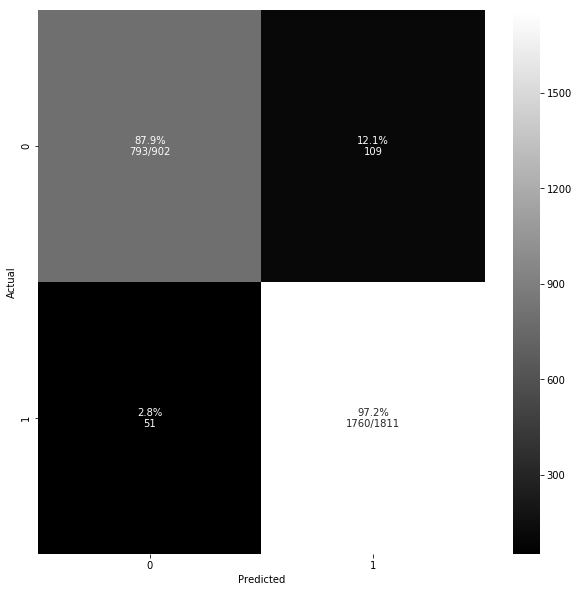

In [123]:
cm_analysis(y, y_predict, 'cm1k', [0,1])

In [124]:
df['predictedInfections1kV2'] = pd.DataFrame(y_predict)

In [125]:
x = calcimportance(model)
print(x)

                    score
estimated_mobile      314
estimated_minority    280
estimated_nohsdp      259
E_PCI                 245
NATURALINC2019        222
estimated_limeng      222
avgWork               164
E_MINRTY              164
E_NOVEH               161
E_UNEMP               155
GQESTIMATES2019       154
E_MUNIT               154
E_MOBILE              153
E_CROWD               147
E_NOHSDP              141
E_LIMENG              136
RESIDUAL2019          131
E_SNGPNT              130
E_POV                 129
avgGroc               129
avgRetail             125
E_DISABL              108
E_GROUPQ              103
E_HU                  101
avgTran                96
estimated_pci          85
E_AGE17                79
POPESTIMATE2019        76
avgParks               66
E_AGE65                62
avgRes                 60
E_HH                   43
F_THEME2               35
F_SNGPNT               20
F_DISABL               19
F_TOTAL                17
F_THEME4               16
F_CROWD     

In [126]:
x.to_csv('features1kV2.csv')

In [127]:
# Make prediction for counties with 0.2% infected population
df7 = makedf2(df,'Infect500')
y, y_predict, model = trainandpredict(df7,'Infect500')
conf_matrix = metrics.classification_report(y,y_predict)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1496
           1       0.94      0.93      0.94      1217

   micro avg       0.94      0.94      0.94      2713
   macro avg       0.94      0.94      0.94      2713
weighted avg       0.94      0.94      0.94      2713



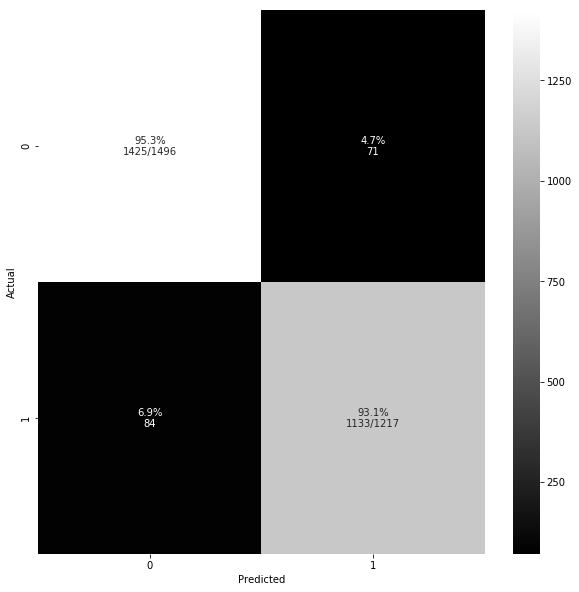

In [128]:
cm_analysis(y, y_predict, 'cm500', [0,1])

In [129]:
df['predictedInfections500V2'] = pd.DataFrame(y_predict)

In [130]:
x = calcimportance(model)
print(x)

                    score
estimated_nohsdp      331
estimated_mobile      302
estimated_limeng      264
NATURALINC2019        238
estimated_minority    234
E_PCI                 222
E_MOBILE              182
GQESTIMATES2019       173
E_MUNIT               156
E_GROUPQ              149
avgWork               142
E_MINRTY              141
E_CROWD               128
avgRetail             126
E_POV                 125
RESIDUAL2019          124
E_DISABL              118
E_NOHSDP              116
avgGroc               112
E_NOVEH               110
E_LIMENG              108
avgRes                108
E_SNGPNT              106
POPESTIMATE2019       102
E_UNEMP                99
avgTran                94
E_HU                   66
avgParks               61
E_AGE17                58
E_AGE65                53
estimated_pci          50
E_HH                   34
F_TOTAL                28
F_CROWD                22
F_THEME3               21
F_THEME2               20
F_POV                  16
F_DISABL    

In [131]:
x.to_csv('features500V2.csv')

In [132]:
# Make prediction for counties with 1% infected population
df8 = makedf2(df,'Infect100')
y, y_predict, model = trainandpredict(df8,'Infect100')
conf_matrix = metrics.classification_report(y,y_predict)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2513
           1       0.96      0.85      0.90       200

   micro avg       0.99      0.99      0.99      2713
   macro avg       0.97      0.92      0.95      2713
weighted avg       0.99      0.99      0.99      2713



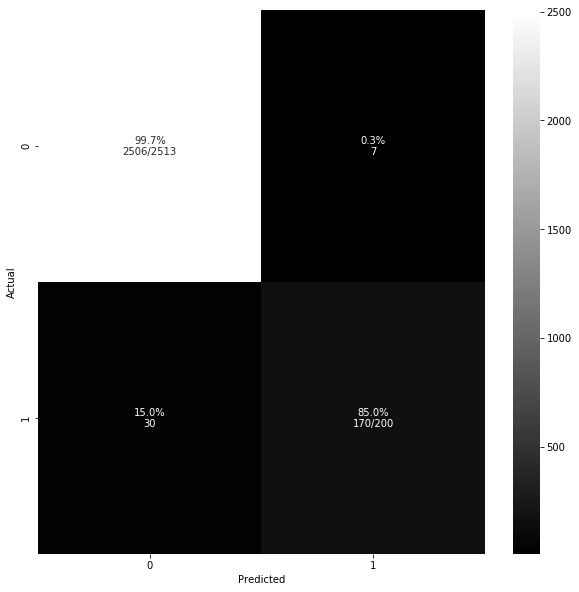

In [133]:
cm_analysis(y, y_predict, 'cm100', [0,1])

In [134]:
df['predictedInfections100V2'] = pd.DataFrame(y_predict)

In [135]:
x = calcimportance(model)
print(x)

                    score
estimated_limeng      233
estimated_minority    232
estimated_nohsdp      225
estimated_mobile      188
NATURALINC2019        150
E_MOBILE              145
GQESTIMATES2019       142
avgGroc               118
E_NOVEH               117
E_MUNIT               112
E_PCI                 107
RESIDUAL2019          105
avgRetail             102
E_LIMENG              100
E_DISABL               89
avgWork                85
E_NOHSDP               82
E_CROWD                81
E_UNEMP                81
E_GROUPQ               75
E_POV                  73
E_MINRTY               72
avgParks               66
E_SNGPNT               55
avgRes                 55
avgTran                53
POPESTIMATE2019        44
estimated_pci          43
E_HU                   41
E_AGE17                35
E_AGE65                33
F_TOTAL                32
F_SNGPNT               28
E_HH                   26
F_NOVEH                15
F_THEME2               13
F_THEME4               11
F_CROWD     

In [136]:
x.to_csv('features100V2.csv')

In [137]:
df['predictedInfections100'] = pd.DataFrame(y_predict)

In [138]:
df.head()

,Unnamed: 0,Unnamed: 0.1,date,county,state,fips,cases,deaths,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2019,NPOPCHG_2019,BIRTHS2019,DEATHS2019,NATURALINC2019,RESIDUAL2019,GQESTIMATES2019,RBIRTH2019,RDEATH2019,RNATURALINC2019,AREA_SQMI,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,avgRes,avgGroc,avgParks,avgTran,avgWork,avgRetail,Infect10k,Infect1k,Infect500,Infect100,predictedInfections100,estimated_mobile,estimated_pci,estimated_nohsdp,estimated_minority,estimated_limeng,predictedInfections1k,predictedInfections500,predictedInfections1kV2,predictedInfections500V2,predictedInfections100V2
0,0,0,2020-06-05,Autauga,Alabama,1001,249,5,54571,54597,55869,336,624,541,83,-1,455,11.202671,9.712572,1.490099,594.443459,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,9.0,45.5,-5.0,-26.0,-11.0,1,1,1,0,0,7.658988,52.572983,7.524745,24.679160,0.762498,1,1,1,1,0
1,1,1,2020-06-05,Baldwin,Alabama,1003,312,9,182265,182265,223234,5379,2304,2326,-22,24,2170,10.446871,10.546624,-0.099753,1589.793007,111945,78622,21653,4343,31203,14310,40665,45677,28863,4508,35339,1068,20492,13075,991,2705,3014,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,5.0,18.0,103.0,5.0,-22.0,7.0,1,1,0,0,0,5.857083,13.977709,6.410314,15.830474,0.478422,1,0,1,0,0
2,2,2,2020-06-05,Barbour,Alabama,1005,184,1,27457,27455,24686,-186,256,312,-56,-2,2812,10.331329,12.591307,-2.259978,885.001636,11937,9186,6597,918,18461,4901,4634,5436,5078,1174,13884,398,152,3484,313,849,2900,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2,8,9.0,3.0,45.5,-5.0,-22.0,12.0,1,1,1,0,0,14.113263,74.783278,19.853358,56.242405,1.612250,1,1,1,1,0
3,3,3,2020-06-05,Bibb,Alabama,1007,79,1,22915,22915,22394,27,240,252,-12,-2,2148,10.723621,11.259802,-0.536181,622.461089,9161,6840,2863,658,20199,2650,3661,4659,3412,407,5726,57,222,2615,52,410,2091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,9.0,8.0,45.5,-5.0,-22.0,-7.0,1,1,1,0,0,11.677235,90.198267,11.833527,25.569349,0.254532,1,1,1,1,0
4,4,4,2020-06-05,Blount,Alabama,1009,66,1,57322,57322,57826,55,651,657,-6,-4,489,11.263268,11.367077,-0.103809,644.830460,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,9.0,45.5,-5.0,-29.0,-3.0,1,1,0,0,0,10.562723,39.179608,13.594231,12.819493,1.615190,1,1,1,1,0


In [139]:
df.to_csv('covid4.csv')

# SQL Queries used to create training set
/* Take data from Covid counties, county population, social vulnerability index, and global mobility report tables.*/

SELECT * FROM(

SELECT 

CONVERT(date,cases.date) AS date, 

cases.county,

cases.state, 

cases.fips, 

cases.cases,

cases.deaths,

row_number() over(partition by cases.fips order by cases.date desc) AS rn,

pop.CENSUS2010POP,

pop.ESTIMATESBASE2010,

pop.POPESTIMATE2019,

pop.NPOPCHG_2019,

pop.BIRTHS2019,

pop.DEATHS2019,

pop.NATURALINC2019,

pop.RESIDUAL2019,

pop.GQESTIMATES2019,

pop.RBIRTH2019,

pop.RDEATH2019,

pop.RNATURALINC2019,

svi.AREA_SQMI,

svi.E_HU,

svi.E_HH,

svi.E_POV,

svi.E_UNEMP,

svi.E_PCI,

svi.E_NOHSDP,

svi.E_AGE65,

svi.E_AGE17,

svi.E_DISABL,

svi.E_SNGPNT,

svi.E_MINRTY,

svi.E_LIMENG,

svi.E_MUNIT,

svi.E_MOBILE,

svi.E_CROWD,

svi.E_NOVEH,

svi.E_GROUPQ,

svi.EP_POV,

svi.EP_UNEMP,

svi.EP_PCI,

svi.EP_NOHSDP,

svi.EP_AGE65,

svi.EP_AGE17,

svi.EP_DISABL,

svi.EP_SNGPNT,

svi.EP_MINRTY,

svi.EP_LIMENG,

svi.EP_MUNIT,

svi.EP_MOBILE,

svi.EP_CROWD,

svi.EP_NOVEH,

svi.EP_GROUPQ,

svi.F_POV,

svi.F_UNEMP,

svi.F_PCI,

svi.F_NOHSDP,

svi.F_THEME1,

svi.F_AGE65,

svi.F_AGE17,

svi.F_DISABL,

svi.F_SNGPNT,

svi.F_THEME2,

svi.F_MINRTY,

svi.F_LIMENG,

svi.F_THEME3,

svi.F_MUNIT,

svi.F_MOBILE,

svi.F_CROWD,

svi.F_NOVEH,

svi.F_GROUPQ,

svi.F_THEME4,

svi.F_TOTAL,

CONVERT(int,glob.residential_percent_change_from_baseline) AS avgRes,

CONVERT(int,glob.grocery_and_pharmacy_percent_change_from_baseline) AS avgGroc,

CONVERT(int,glob.parks_percent_change_from_baseline) AS avgParks,

CONVERT(int,glob.transit_stations_percent_change_from_baseline) AS avgTran,

CONVERT(int,glob.workplaces_percent_change_from_baseline) AS avgWork,

CONVERT(int,glob.retail_and_recreation_percent_change_from_baseline) AS avgRetail,

CASE WHEN(cases.cases / pop.POPESTIMATE2019) >= 0.0001 THEN 1

ELSE 0 END AS Infect1k,

CASE WHEN(cases.cases / pop.POPESTIMATE2019) >= 0.002 THEN 1

ELSE 0 END AS Infect500,

CASE WHEN(cases.cases / pop.POPESTIMATE2019) >= 0.001 THEN 1

ELSE 0 END AS Infect100 

FROM

tCovidCountiesCases AS cases

LEFT OUTER JOIN tCountyPopulation2019 AS pop

ON cases.fips = pop.fips

LEFT OUTER JOIN tSVI2018County AS svi

ON pop.fips = svi.FIPS 

join tGlobalMobility as glob

ON pop.CTYNAME = glob.sub_region_2 AND cases.date = CONVERT(date,glob.date) AND pop.STNAME = glob.sub_region_1) t

WHERE t.rn = 1


## Preprocessing 

/* Only keep United States data */

DELETE FROM tGlobalMobility

WHERE country_region <> 'United States';

/* Create fips code in county population table */

UPDATE tCountyPopulation2019

SET fips = REPLICATE('0',2-LEN(STATE)) + STATE + REPLICATE('0',3-LEN(COUNTY)) + COUNTY

/* Make sure that all fips codes are 5 digits in length */

UPDATE svi2018

SET FIPS = CONCAT(REPEAT('0',5-LENGTH(FIPS)), FIPS);

/* Set fips code for New York City since it was missing */

UPDATE tCovidCountiesCases

SET fips = '36061'

where county = 'New York City'